# **Dhwani Bhavankar**
## **AIML A2**
### **22070126034**

# Value Iteration

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from envs import Maze # importing the maze environment
from utils import plot_policy, plot_values, test_agent # importing helper functions for visualization and testing

# Initialize the environment

In [ ]:
env = Maze() # creating an instance of the maze environment

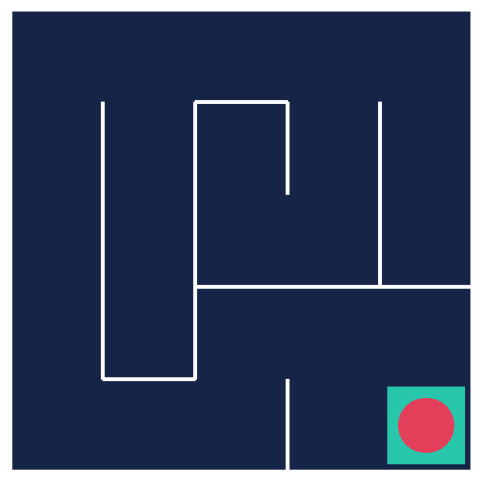

In [ ]:
frame = env.render(mode = 'rgb_array') # rendering the maze as an image
plt.figure(figsize=(6,6))
plt.axis('off')
plt.imshow(frame)

In [ ]:
print(f"Observation space shape: {env.observation_space.nvec}") # printing the shape of the observation space
print(f"Number of actions {env.action_space.n}") # printing the number of possible actions

Observation space shape: [5 5]
Number of actions 4


# Define the policy

Create the policy

In [ ]:
policy_probs = np.full((5,5,4), 0.25) # initializing a policy with equal probability for all actions in all the 5 grids of 5x4 dimensions

In [ ]:
policy_probs #printing the policy_probs

array([[[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]],

       [[0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25],
        [0.25, 0.25, 0.25, 0.25]]])

In [ ]:
def policy(state):
  return policy_probs[state] # retrieving the policy probabilities for the given state

# Test the policy with state (0,0)

In [ ]:
action_probabilities = policy((0,0)) # getting the action probabilities for the state (0,0)
for action, prob in zip(range(4), action_probabilities):  # using zip to have record of indices too
  print(f"Action {action} with probability {prob}") # printing each action with its probability

Action 0 with probability 0.25
Action 1 with probability 0.25
Action 2 with probability 0.25
Action 3 with probability 0.25


# See how the random policy does in the maze

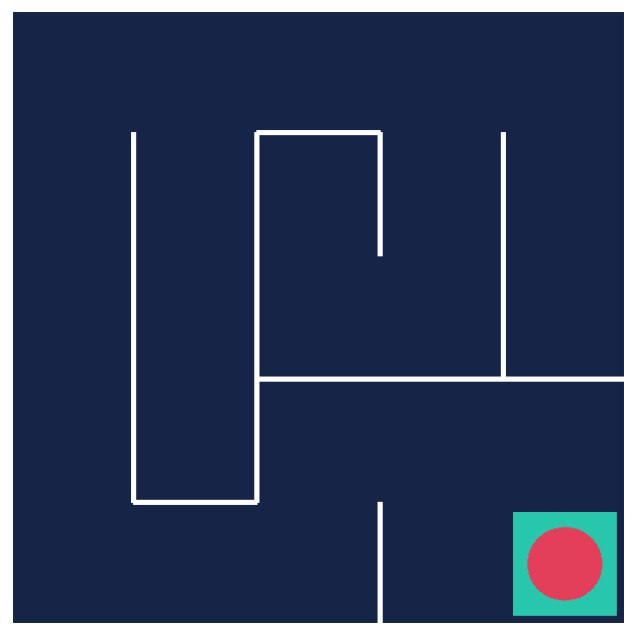

In [ ]:
test_agent(env, policy, episodes = 1)  # testing the agent using the defined policy for one episode


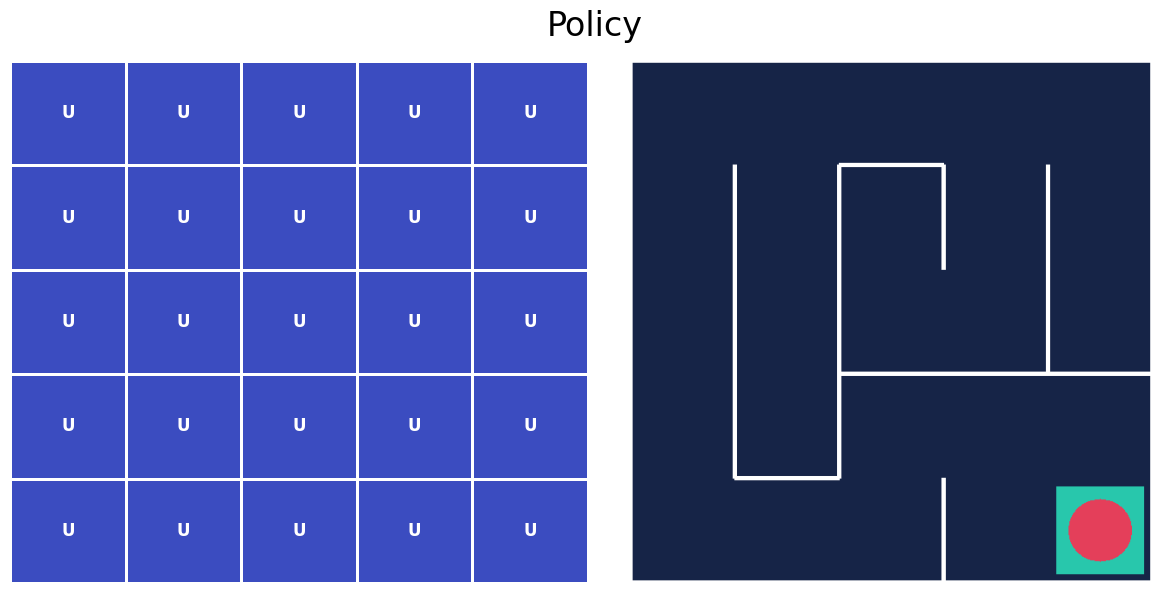

In [ ]:
np.object = object # aliasing np.object to the built-in object type to avoid deprecation warnings
plot_policy(policy_probs, frame)

In [ ]:
state_values = np.zeros((5,5)) # initializing state values (Value function) as a 5x5 grid filled with zeros

In [ ]:
def value_iteration(policy_probs, state_values, theta=1e-6, gamma=0.99):  #  value iteration function with threshold and discount factor
  delta = float('inf')  # initializing delta to a high value to start loop

  while delta > theta:  # loop until value function converges
    delta = 0  # reset delta each iteration
    for row in range(5):  # iterate over each row in the grid
      for col in range(5):  # iterate over each column in the grid
        old_value = state_values[(row, col)]  # store the old value for comparison
        action_probs = None  # placeholder for action probabilities
        max_qsa = float('-inf')  # initialize max q-value to negative infinity

        for action in range(4):  # iterate over all possible actions
          next_state, reward, _, _ = env.simulate_step((row, col), action)  # get next state and reward
          qsa = reward + gamma * state_values[next_state]  # compute q-value using bellman equation
          if qsa > max_qsa:  # update max q-value if better action found
            max_qsa = qsa
            action_probs = np.zeros(4)  # reset action probabilities
            action_probs[action] = 1.  # assign probability of 1 to best action
        state_values[(row, col)] = max_qsa  # update state value with max q-value
        policy_probs[(row, col)] = action_probs  # update policy with best action

        delta = max(delta, abs(max_qsa - old_value))  # update delta to track convergence

In [ ]:
value_iteration(policy_probs, state_values) # running value iteration to optimize policy and state values

# SHow Results

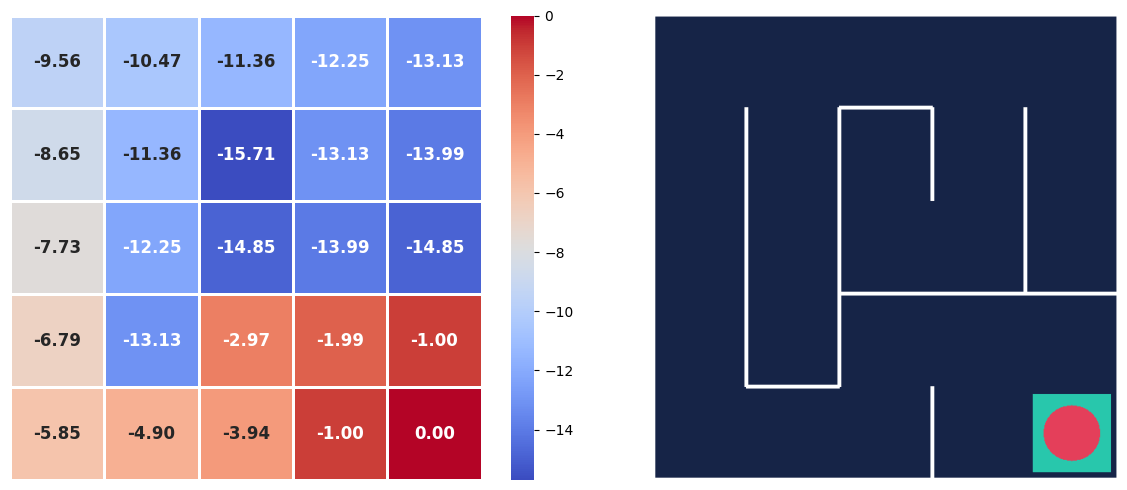

In [ ]:
plot_values(state_values, frame) # visualizing the computed state values on the maze

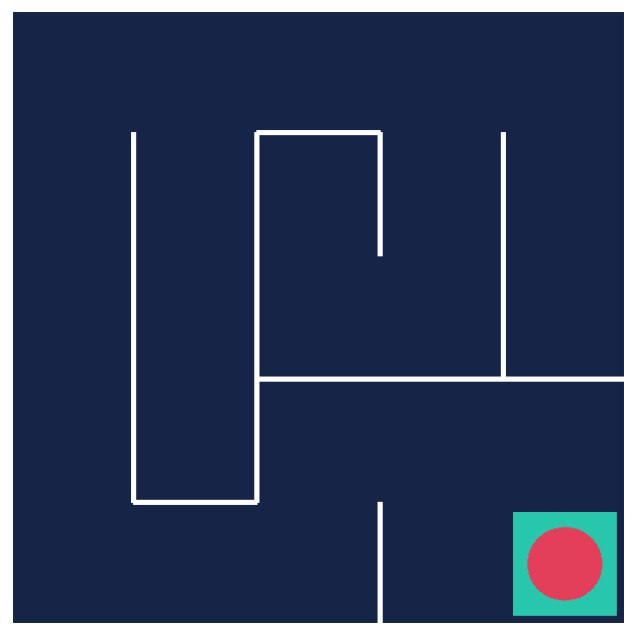

In [ ]:
test_agent(env, policy) # testing the maze